# Simple Appliances with multiple functioning windows

In [1]:
# importing functions
from ramp import User, UseCase, get_day_type
import pandas as pd

### Creating a user category 

In [2]:
household = User(
    user_name="Household",
    num_users=10,
)

### Creating a simple appliance with two functioning time

In [3]:
indoor_bulb = household.add_appliance(
    name="Indoor Light Bulb",
    number=6,
    power=7,
    num_windows=2,
    func_time=120,
    time_fraction_random_variability=0.2,
    func_cycle=10,
    window_1=[1170, 1440],  # from 19:30 to 24:00
    window_2=[0, 30],  # from 24 to 00:30
    random_var_w=0.35,
)

<Axes: >

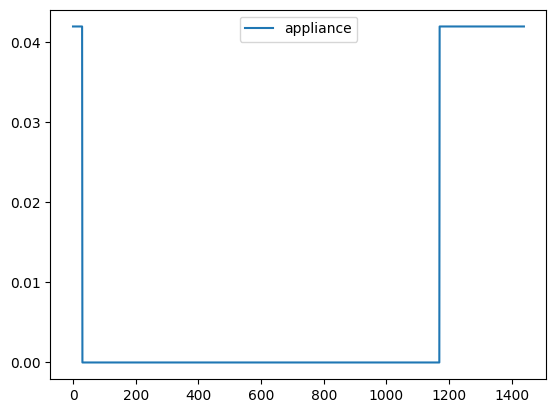

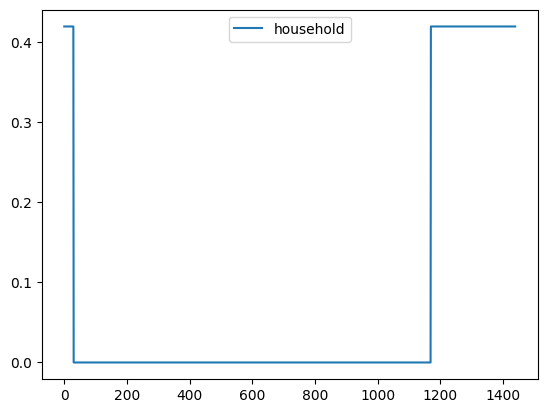

In [4]:
# Checking the maximum profile of the appliance and user

max_profile_bulb = pd.DataFrame(indoor_bulb.maximum_profile, columns=["appliance"])
max_profile_user = pd.DataFrame(household.maximum_profile, columns=["household"])

max_profile_bulb.plot()
max_profile_user.plot()

### Whole year profile functionality

In [5]:
whole_year_profile = []
use_case = UseCase(users=[household], date_start="2020-01-01", date_end="2020-12-31")
whole_year_profile = use_case.generate_daily_load_profiles()

You will simulate 366 day(s) from 2020-01-01 00:00:00 until 2021-01-01 00:00:00


<Axes: >

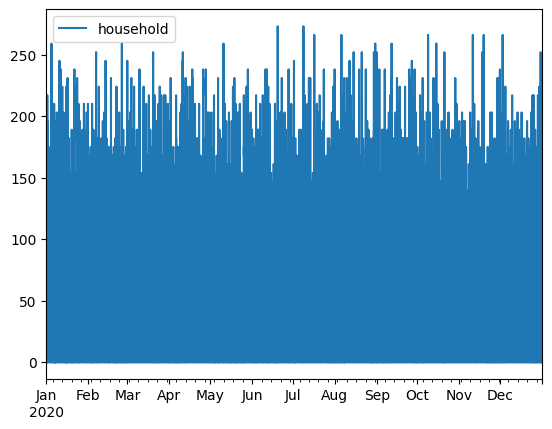

In [6]:
whole_year_profile = pd.DataFrame(
    whole_year_profile, columns=["household"], index=use_case.datetimeindex
)
whole_year_profile.plot()

### Generating a profile for a single day
provide day_type=0 for weekday and day_type=1 for weekends

In [10]:
single_profile = household.generate_single_load_profile(day_type=0)

<Axes: >

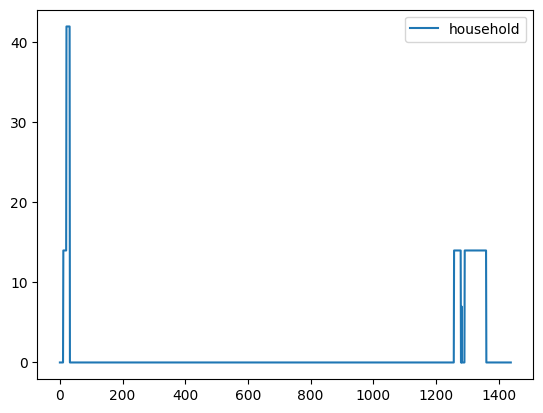

In [11]:
single_profile = pd.DataFrame(single_profile, columns=["household"])
single_profile.plot()

### Generating aggregated_load_profile for the user category

Single daily profiles are aggregated for all the users defined within the User class

In [12]:
aggregated_profile = household.generate_aggregated_load_profile()

<Axes: >

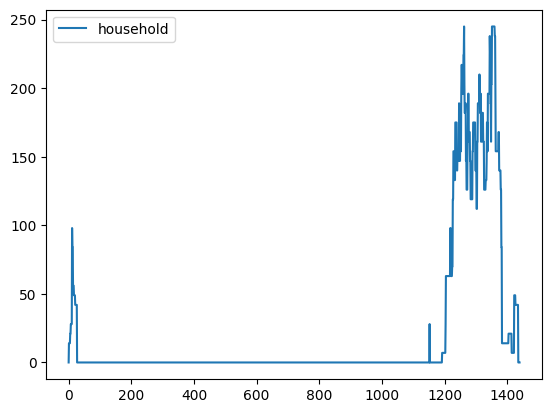

In [13]:
aggregated_profile = pd.DataFrame(aggregated_profile, columns=["household"])
aggregated_profile.plot()